In [1]:
suppressMessages(suppressWarnings(library(tidyverse)))

https://data.library.virginia.edu/getting-started-with-negative-binomial-regression-modeling/
The variance of a negative binomial distribution is a function of its mean and has an additional parameter, k, called the dispersion parameter. Say our count is random variable Y from a negative binomial distribution, then the variance of Y is

$$var(Y) = \mu + \mu^2 / k$$

In [2]:
### let log(var) = 2 * log(mu) + 1
get_var = function(x){return(exp(1.2 * log(x) - 1))}

### dispersion phi = mu^2 / (var - mu)
get_phi = function(m, v){return(m^2 / (v - m))}

### generate Y
get_Y = function(X, A, B, L, verbose=FALSE){
    Y = sapply(seq_len(N), function(i){
        ### extract
        x = X[i]; a = A[i]; b = B[i]
    
        ### get mean of NB
        m = exp(a + b * x) * L
    
        ### get variance
        v = get_var(m)
    
        ### get dispersion from mean and variance
        phi = get_phi(m, v)
        
        if(verbose){
            cat(round(m,   digits = 2), 
                round(v,   digits = 2), 
                round(phi, digits = 2), "\n")
        }
    
        ### generate a value from NB with mean 'm' and variance 'v'
        y = MASS::rnegbin(n=1, mu=m, theta=phi)
        return(y)
    })   
    return(Y)
}

In [10]:
exp(-10.31 + log(1.2)) / exp(-10.31)

[1] 1.2

In [11]:
exp(-10.31 + log(1.2)) * 1000

[1] 0.03995813

In [ ]:
### generate Y
Ys = lapply(1:n_points, function(idx){     
    print("hello")
    Y = get_Y(X, A, B, L, verbose=TRUE)
    #Y = get_Y(X, A, B, L, verbose=FALSE)
    #Y = suppressWarnings(get_Y(X, A, B, L, verbose=FALSE))
    return(Y)
})

In [28]:
1200/exp(-10.31 + log(1.2))

[1] 30031437

In [40]:
set.seed(123)

n   = 10
N   = n * 2
s_a = 1
s_b = 1
n_points = 1000
L   = 30031436

### generate alpha and beta
A = rnorm(N, mean=-10.31,   sd=s_a^0.5)
B = rnorm(N, mean=log(1.2), sd=s_b^0.5)

### generate X
X = c(rep(0, n), rep(1, n))


### generate Y
#Y = get_Y(X, A, B, L, verbose=TRUE)
Ys = lapply(1:n_points, function(idx){     
    #print("hello")
    #Y = get_Y(X, A, B, L, verbose=TRUE)
    Y = get_Y(X, A, B, L, verbose=FALSE)
    #Y = suppressWarnings(get_Y(X, A, B, L, verbose=FALSE))
    return(Y)
})

In [34]:
length(Ys[[1]])

[1] 20

In [35]:
dat = do.call(rbind, Ys)
print(dim(dat))
head(dat)

[1] 1000   20


580,825,4702,1049,1126,5645,1592,286,496,637,6312,1314,4486,3138,1583,14186,3405,147,1839,508
561,780,4809,1100,1202,5647,1566,286,487,640,6318,1259,4504,3266,1657,14261,3382,174,1846,531
566,812,4715,995,1225,5284,1555,291,482,628,6067,1248,4541,3161,1513,14174,3359,130,1770,508
597,802,4932,1003,1236,5432,1570,275,509,645,6355,1362,4344,3214,1538,14240,3366,149,1842,491
594,768,4558,1023,1107,5673,1572,281,532,714,6290,1283,4493,3136,1573,14330,3295,172,1818,507
574,789,4553,1039,1091,5382,1637,284,505,630,6258,1329,4208,3257,1534,14271,3378,147,1806,545


https://stackoverflow.com/questions/25099825/row-wise-variance-of-a-matrix-in-r

In [36]:
rowVars <- function(x, ...) {
  rowSums((x - rowMeans(x, ...))^2, ...)/(dim(x)[2] - 1)
}

In [37]:
dat = do.call(rbind, Ys)
dat = dat %>% 
    as.data.frame %>% 
    na.omit %>%
    mutate(Mean = rowMeans(.), 
           Var  = rowVars(.)) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    ) 

###
print(dim(dat))
head(dat)

[1] 1000   24


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,Mean,Var,log10mu,log10var
580,825,4702,1049,1126,5645,1592,286,496,637,...,1583,14186,3405,147,1839,508,2692.80,10849896,3.430204,7.035426
561,780,4809,1100,1202,5647,1566,286,487,640,...,1657,14261,3382,174,1846,531,2713.80,10958650,3.433578,7.039757
566,812,4715,995,1225,5284,1555,291,482,628,...,1513,14174,3359,130,1770,508,2651.20,10686063,3.423442,7.028818
597,802,4932,1003,1236,5432,1570,275,509,645,...,1538,14240,3366,149,1842,491,2695.10,10888388,3.430575,7.036964
594,768,4558,1023,1107,5673,1572,281,532,714,...,1573,14330,3295,172,1818,507,2685.95,10985952,3.429098,7.040838
574,789,4553,1039,1091,5382,1637,284,505,630,...,1534,14271,3378,147,1806,545,2660.85,10788279,3.425020,7.032952


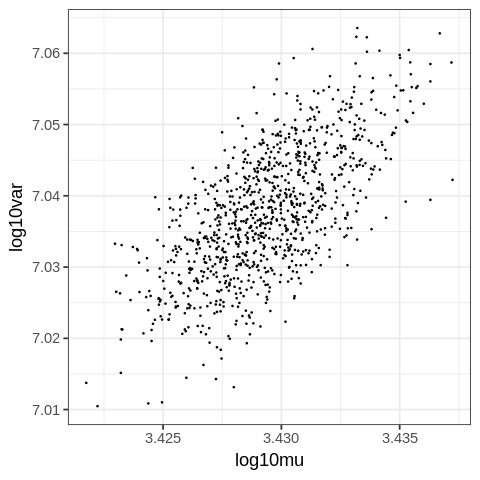

In [38]:
options(repr.plot.height=4, repr.plot.width=4)
ggplot(dat, aes(x=log10mu, y=log10var)) + 
    geom_point(size=0.1) + 
    geom_abline(slope = 1) +
    
    theme_bw()

In [244]:
exp(10)

[1] 22026.47

In [ ]:
### let log(var) = 2 * log(mu) + 1
get_var = function(x){return(exp(1.2 * log(x) - 1))}

### dispersion phi = mu^2 / (var - mu)
get_phi = function(m, v){return(m^2 / (v - m))}

In [15]:
alpha_true = -10.31
beta_true  = log(1.2)

m0 = 1000
m1 = 1200

v0 = 3687
v1 = 4109

In [17]:
phi0 = get_phi(m0, v0)
phi1 = get_phi(m1, v1)

y0 = MASS::rnegbin(n=10, mu=m0, theta=phi0)
y1 = MASS::rnegbin(n=10, mu=m1, theta=phi1)

In [18]:
y0

[1]  969 1002  978 1052 1000  967  934  977 1021  956

In [19]:
y1

[1] 1233 1134 1268 1129 1206 1229 1144 1147 1211 1193

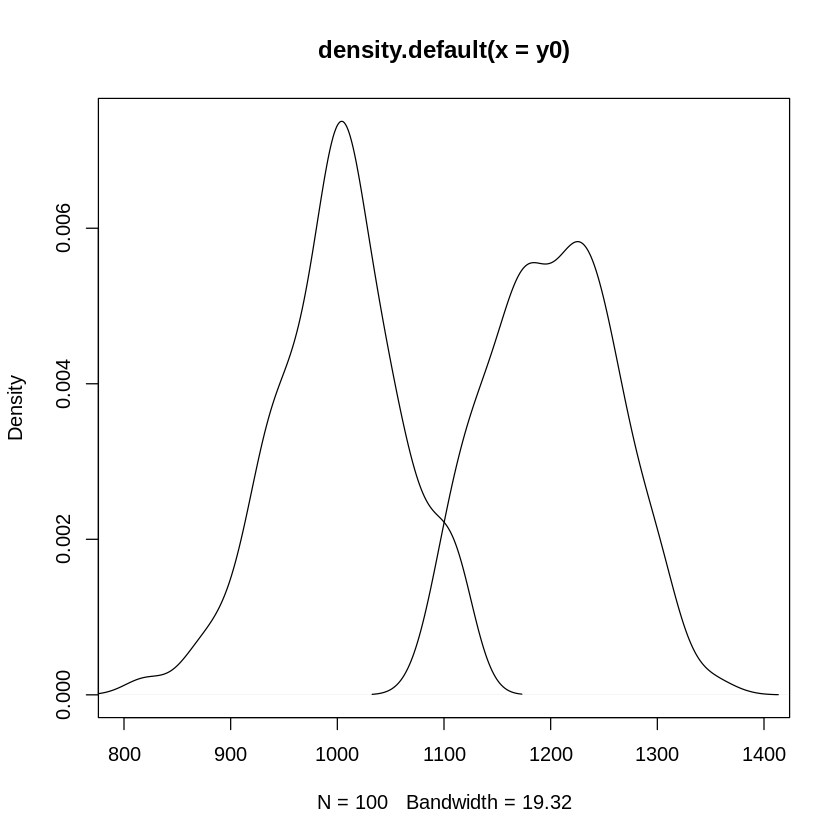

In [25]:
y0 = MASS::rnegbin(n=100, mu=m0, theta=phi0)
y1 = MASS::rnegbin(n=100, mu=m1, theta=phi1)

plot(density(y0), xlim = c(800, 1400))
lines(density(y1))

In [26]:
1000/exp(-10.31)

[1] 30031437